In [1]:
import numpy as np
import torch
torch.cuda.empty_cache()
import joblib.numpy_pickle as joblib
import matplotlib.pyplot as plt
import autoencoder_functions
import seperate_spec_and_features

#see if cuda is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('Using device:', device)

import save_model


Using device: cuda


In [2]:
path_file = 'final_models/shank3_pups_combined_8_v0'
folder_file = path_file + '/latent_spaces_and_library/'

In [3]:
m_train = joblib.load(folder_file + 'm_train')
m_test = joblib.load(folder_file + 'm_test')
emitter_library_combined = joblib.load(folder_file + 'emitter_library_combined')

In [4]:
# --- Load Data ---
spectograms_file_pups = 'emitter_and_specs.jl'
usvs_pups = joblib.load(spectograms_file_pups)
(spec_pups, emitter_pups )= seperate_spec_and_features.seperate_spec_and_emitter_pups(usvs_pups)

spectograms_file_shank3 = 'shank3USVs_many_properties.jl'
usvs_shank3 = joblib.load(spectograms_file_shank3)
(
    spec_shank3,
    emitter_shank3,
    distance_to_nearest_non_emitter,
    duration,
    start_time_in_recording,
    end_time_in_recording,
    intensities,
    intensity,
    location,
    main_freq,
    recording_path,
) = seperate_spec_and_features.separate_spec_and_features(usvs_shank3)

# --- print shapes of data ---
print(f"Number of pup specs: {len(spec_pups)}")
print(f"Number of shank3 specs: {len(spec_shank3)}")
print(f"Total number of specs: {len(spec_pups) + len(spec_shank3)}")
print(f"Number of pup emitters: {len(emitter_pups)}")
print(f"Number of shank3 emitters: {len(emitter_shank3)}")
print(f"Total number of emitters: {len(emitter_pups) + len(emitter_shank3)}")

# --- Combine Data ---
spec = spec_pups + spec_shank3
emitter = emitter_pups + emitter_shank3


Number of pup specs: 18547
Number of shank3 specs: 50473
Total number of specs: 69020
Number of pup emitters: 18547
Number of shank3 emitters: 50473
Total number of emitters: 69020


In [5]:
spec_indices_train_loaded = torch.load(path_file + '/spec_indices_train')
spec_indices_test_loaded = torch.load(path_file + '/spec_indices_test')

C:\Users\ruben\AppData\Local\Temp\ipykernel_21144\3994889783.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  spec_indices_train_loaded = torch.load(path_file + '/spec_in

In [6]:
#get emitters for train and test set
emitter_train = [emitter[i] for i in spec_indices_train_loaded]
emitter_test = [emitter[i] for i in spec_indices_test_loaded]
print('First ten emitters in train set:', emitter_train[:10])
print('First ten emitters in test set:', emitter_test[:10])

First ten emitters in train set: ['M098', 'M698', 'M074', 'M098', 'M530', 'pup2', 'M098', 'M067', 'M103', 'M067']
First ten emitters in test set: ['pup2', 'M064', 'M098', 'M103', 'M581', 'M098', 'M098', 'M098', 'M069', 'M530']


In [7]:
#transform emitters to labels with emitter_library_combined
emitter_train_label = [emitter_library_combined[e] for e in emitter_train]
emitter_test_label = [emitter_library_combined[e] for e in emitter_test]

print('First ten emitter labels in train set:', emitter_train_label[:10])
print('First ten emitter labels in test set:', emitter_test_label[:10])

First ten emitter labels in train set: [1, 1, 1, 1, 1, 0, 1, 1, 1, 1]
First ten emitter labels in test set: [0, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [8]:
# import umap
# #visualize latent space of test set in umap and color by emitter labels but use train set as fit
# reducer = umap.UMAP()
# reducer.fit(m_train.numpy())
# embedding = reducer.transform(m_test.numpy())
# plt.figure(figsize=(10, 8))
# scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=emitter_test_label, cmap='RdBu', s=5)
# plt.colorbar(scatter, label='Emitter Label')
# plt.title('UMAP Projection of Test Set Latent Space Colored by Emitter Labels')
# plt.xlabel('UMAP 1')
# plt.ylabel('UMAP 2')
# plt.show()


In [9]:
# #now visualize the train set in umap and color by emitter labels
# embedding_train = reducer.transform(m_train.numpy())
# plt.figure(figsize=(10, 8))
# scatter = plt.scatter(embedding_train[:, 0], embedding_train[:, 1], c=emitter_train_label, cmap='RdBu', s=5)
# plt.colorbar(scatter, label='Emitter Label')
# plt.title('UMAP Projection of Train Set Latent Space Colored by Emitter Labels')
# plt.xlabel('UMAP 1')
# plt.ylabel('UMAP 2')
# plt.show()


In [10]:
# import features_single
# #extract traditional features from all specs
# traditional_features = []
# for i in range(len(spec)):
#     traditional_features.append(features_single.get_usv_features(spec[i]))
# print('Extracted traditional features from all specs.')

In [11]:
# print(len(traditional_features))
# #save traditional features
# traditional_features_file = 'traditional_features_combined.jl'
# joblib.dump(traditional_features, traditional_features_file)

In [12]:
#load traditional features
traditional_features_file = 'traditional_features_combined.jl'
traditional_features = joblib.load(traditional_features_file)

In [13]:
print(len(traditional_features))
print(len(emitter))

69020
69020


In [14]:
import prediction_results_combined

In [15]:
# make emitter_train_label and emitter_test_label integers
emitter_train_label = [int(label) for label in emitter_train_label]
emitter_test_label = [int(label) for label in emitter_test_label]
print("First ten integer emitter labels in train set:", emitter_train_label[:10])
print("First ten integer emitter labels in test set:", emitter_test_label[:10])
#make them numpy arrays
emitter_train_label = np.array(emitter_train_label)
emitter_test_label = np.array(emitter_test_label)



First ten integer emitter labels in train set: [1, 1, 1, 1, 1, 0, 1, 1, 1, 1]
First ten integer emitter labels in test set: [0, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [16]:
#make emitter label
emitter_label = [emitter_library_combined[e] for e in emitter]
#make them integers
emitter_label = [int(label) for label in emitter_label]
emitter_label = np.array(emitter_label)
print("First ten integer emitter labels in full set:", emitter_label[:10])
print("Total number of emitters in full set:", len(emitter_label))

First ten integer emitter labels in full set: [0 0 0 0 0 0 0 0 0 0]
Total number of emitters in full set: 69020


In [17]:
#check what traditional_features or emitter_label are for arrays
print(type(traditional_features))
print(type(emitter_label))
# Use a list comprehension to pull each feature off the GPU
traditional_features_cpu = [f.get() if hasattr(f, 'get') else f for f in traditional_features]

# Now you can safely convert the whole thing to a NumPy array
traditional_features = np.array(traditional_features_cpu)

print("New type:", type(traditional_features))
print("New shape:", traditional_features.shape)
#squeeze traditional features 
traditional_features = np.squeeze(traditional_features)
print("Squeezed shape:", traditional_features.shape)

<class 'list'>
<class 'numpy.ndarray'>
New type: <class 'numpy.ndarray'>
New shape: (69020, 15, 1)
Squeezed shape: (69020, 15)


In [ ]:
prediction_results_combined.developmental_stage_prediction_model_weighted_and_hardcoded(m_train, m_test, emitter_train_label, emitter_test_label, traditional_features, emitter_label, n_neighbours = 30, n_permutations =100)


In [ ]:
# features_train = traditional_features[spec_indices_train_loaded]
# features_test = traditional_features[spec_indices_test_loaded]
# print("Features train shape:", features_train.shape)
# print("Features test shape:", features_test.shape)


Features train shape: (44080, 15)
Features test shape: (9447, 15)


Weight WT = 7.693491306354824e-05
Weight KO = 3.217296184286725e-05
train latent shape: (44080, 8)
test latent shape: (9447, 8)
Train latent shape after umap = (44080, 8)
Test latent shape after umap = (9447, 8)
Indices shape:  (9447, 30)
Distances shape:  (9447, 30)
Labels nearest neighbours shape:  (9447, 30)
Overall accuracy:  0.684132528845136
[0.48883243 0.48152853 0.47687096 0.48121097 0.47951731 0.48057584
 0.48872658 0.47994072 0.49169048 0.48195194 0.47845877 0.48787975
 0.47464804 0.47814121 0.48957341 0.46882608 0.49274902 0.47835292
 0.47697682 0.47771779 0.48385731 0.47951731 0.49221975 0.49179634
 0.48163438 0.4822695  0.48914999 0.48660951 0.47845877 0.48586853
 0.4694612  0.46914364 0.47687096 0.47845877 0.48258706 0.47433048
 0.47401291 0.47888218 0.47761194 0.48830317 0.46882608 0.48216365
 0.49010268 0.48745634 0.48671536 0.48406902 0.49020853 0.47485974
 0.47856462 0.47994072 0.48904414 0.46882608 0.49031439 0.48248121
 0.49613634 0.48491585 0.48862073 0.48025828 0.

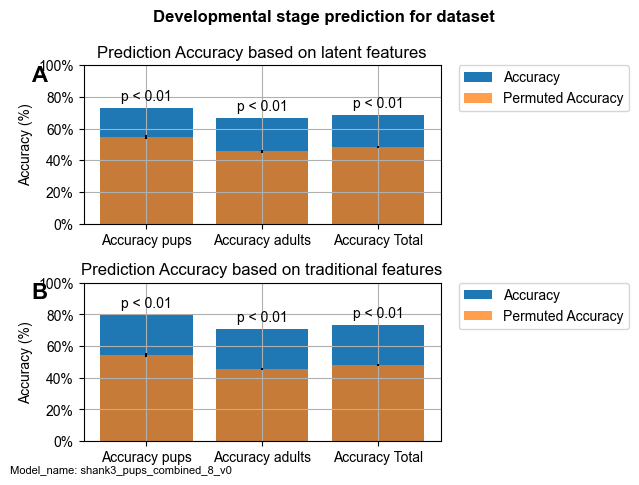

In [ ]:
# prediction_results_combined.developmental_stage_prediction_model_weighted_and_hardcoded_set(m_train, m_test, emitter_train_label, emitter_test_label, features_train, features_test, emitter_label, n_neighbours = 30, n_permutations =100)
